In [ ]:
# Studying a stores sales' drivers

#Using the sales dataset

1. Pick Variables for the model
2. Analyse the data/summary statistics
3. Correlation matrix
4. Create a train/test set
5. Preform regression

In [ ]:
import pandas as pd
import seaborn as sns
import math as m
import scipy.stats as st
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
df_clothing = pd.read_csv('Clothing.csv')
df_clothing.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [ ]:
df_clothing.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


In [ ]:
df_clothing.dtypes

tsales       int64
sales      float64
margin     float64
nown       float64
nfull      float64
npart      float64
naux       float64
hoursw       int64
hourspw    float64
inv1       float64
inv2       float64
ssize        int64
start      float64
dtype: object

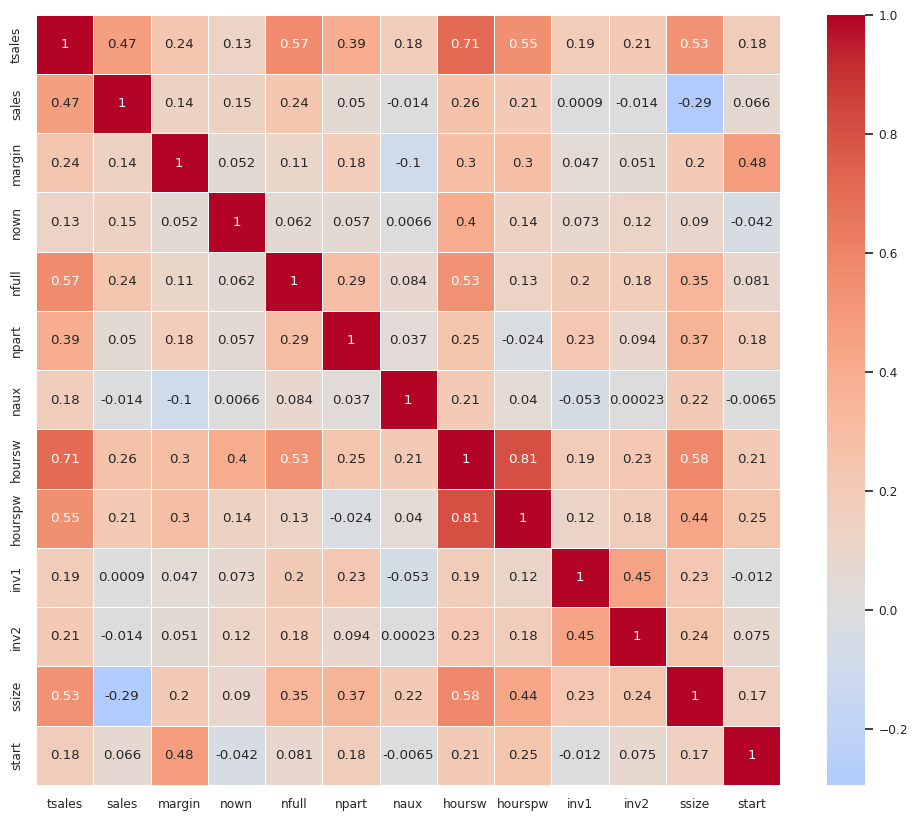

In [ ]:
sns.set(font_scale =.8)
plt.figure(figsize=(12, 10))
sns.heatmap(df_clothing.corr(),annot=True, fmt ='.2g',  linewidths=.5, cmap='coolwarm', center =0)
plt.show()
plt.show()

In [ ]:
y = df_clothing.tsales/1000
x = df_clothing.drop(columns = ['tsales', 'sales', 'hourspw','hoursw','npart','naux','nfull'])
x = sm.add_constant(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1502)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           5.64e-23
Time:                        10:41:21   Log-Likelihood:                -2424.6
No. Observations:                 320   AIC:                             4863.
Df Residuals:                     313   BIC:                             4890.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.9418    207.403     -0.843      0.4

In [ ]:
predictions = model.predict(x_test)
predictions[:2]

270    1621.698835
380     771.351348
dtype: float64

In [ ]:
print("MAE:" , round(mean_absolute_error(y_test, predictions),1))
print("MSE:" , round(mean_squared_error(y_test, predictions),1))
print("RMSE:" , round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 346.9
MSE: 279859.5
RMSE: 529.0
